# Get Data From API and save it for further use

In [1]:
# pip install pandas_datareader

In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('GOOG', api_key='1b82b56833e3ecdfdf8e30e1353779aa39683e99')

C:\Users\sabinmc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('google_data.csv')

# Processing Data

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')

In [7]:
df2= df.reset_index()['close']

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-17 00:00:00+00:00,170.15,171.39,169.6400,171.04,21665811,40.447031,40.741797,40.325797,40.658597,86663244,0.0,1.0
1,AAPL,2017-11-20 00:00:00+00:00,169.98,170.56,169.5600,170.29,15974387,40.406620,40.544494,40.306780,40.480311,63897548,0.0,1.0
2,AAPL,2017-11-21 00:00:00+00:00,173.14,173.70,170.7800,170.78,24875471,41.157796,41.290916,40.596791,40.596791,99501884,0.0,1.0
3,AAPL,2017-11-22 00:00:00+00:00,174.96,175.00,173.0500,173.36,24997274,41.590436,41.599944,41.136402,41.210093,99989096,0.0,1.0
4,AAPL,2017-11-24 00:00:00+00:00,174.97,175.50,174.6459,175.10,14026519,41.592813,41.718801,41.515770,41.623716,56106076,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-11-09 00:00:00+00:00,134.87,138.55,134.5933,138.500,74917794,134.87,138.55,134.5933,138.500,74917794,0.0,1.0
1253,AAPL,2022-11-10 00:00:00+00:00,146.87,146.87,139.5000,141.240,118854028,146.87,146.87,139.5000,141.240,118854028,0.0,1.0
1254,AAPL,2022-11-11 00:00:00+00:00,149.70,150.01,144.3700,145.820,93979665,149.70,150.01,144.3700,145.820,93979665,0.0,1.0
1255,AAPL,2022-11-14 00:00:00+00:00,148.28,150.28,147.4300,148.970,73374114,148.28,150.28,147.4300,148.970,73374114,0.0,1.0
1256,AAPL,2022-11-15 00:00:00+00:00,150.04,153.59,148.5613,152.215,89868332,150.04,153.59,148.5613,152.215,89868332,0.0,1.0


In [10]:
df2.shape

(1257,)

In [11]:
df2.head()

0    170.15
1    169.98
2    173.14
3    174.96
4    174.97
Name: close, dtype: float64

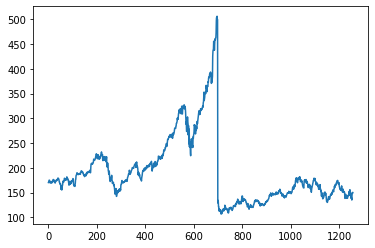

In [12]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [13]:
import numpy as np


In [14]:
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
df_dataset = scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df_dataset.shape)

(1257, 1)


In [16]:
df_dataset

array([[0.15857232],
       [0.15814652],
       [0.16606137],
       ...,
       [0.10735128],
       [0.10379461],
       [0.10820288]])

In [17]:
# split dataset for analysis if needed
split_ratio = 0.9         # 1 is max
training_size = int(len(df_dataset) * split_ratio)
testing_size = len(df_dataset) - training_size
print(training_size, testing_size)
train_data = df_dataset[0:training_size,:]



1131 126


In [18]:
test_data = df_dataset[training_size:len(df_dataset),:]
print(test_data.shape)

(126, 1)


In [19]:
print('Train data: %s,  Test data: %s'%(train_data, test_data))
print('Train data Shape: %s,  Test data Shape: %s'%(train_data.shape, test_data.shape))

Train data: [[0.15857232]
 [0.15814652]
 [0.16606137]
 ...
 [0.10086412]
 [0.09693175]
 [0.10619912]],  Test data: [[0.08510958]
 [0.07641828]
 [0.07701941]
 [0.09084534]
 [0.08395742]
 [0.08435817]
 [0.09252348]
 [0.107201  ]
 [0.10519724]
 [0.10487163]
 [0.11113338]
 [0.096531  ]
 [0.09843456]
 [0.10487163]
 [0.10299311]
 [0.08966813]
 [0.07586725]
 [0.0627176 ]
 [0.06492173]
 [0.07160927]
 [0.05815905]
 [0.06191609]
 [0.07271133]
 [0.07140889]
 [0.0787226 ]
 [0.08721353]
 [0.08721353]
 [0.07664371]
 [0.08112711]
 [0.07484033]
 [0.0803757 ]
 [0.08696306]
 [0.09036944]
 [0.09896055]
 [0.10068879]
 [0.0952536 ]
 [0.09773325]
 [0.09680651]
 [0.10427051]
 [0.10852849]
 [0.10076393]
 [0.11060739]
 [0.11571697]
 [0.12150282]
 [0.1183469 ]
 [0.11549155]
 [0.11211021]
 [0.12510958]
 [0.12651221]
 [0.13943644]
 [0.13693175]
 [0.1331747 ]
 [0.14850344]
 [0.14770194]
 [0.14654978]
 [0.14534753]
 [0.14547276]
 [0.15629305]
 [0.15441453]
 [0.16345648]
 [0.1661866 ]
 [0.16578585]
 [0.16959299]
 [0

In [20]:
def prepare_data(timeseries_data, n_steps):
    seq_X, seq_Y = [], []
    for i in range(len(timeseries_data)-n_steps-1):
        endi = i + n_steps
        X = timeseries_data[i:endi]
        y = timeseries_data[endi]
        seq_X.append(X)
        seq_Y.append(y)
    return np.array(seq_X), np.array(seq_Y)

In [21]:
n_steps = 100
X_train, y_train = prepare_data(train_data, n_steps)
X_test, y_test = prepare_data(test_data, n_steps)

In [22]:
X_train.shape

(1030, 100, 1)

In [23]:
y_train.shape

(1030, 1)

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(n_steps,1)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1),
    
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_7 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


In [64]:
history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, shuffle=True)

Epoch 1/50
17/17 [==============================] - 35s 695ms/step - loss: 0.0215 - accuracy: 0.0019 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 7s 392ms/step - loss: 0.0075 - accuracy: 0.0019 - val_loss: 4.1249e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 4s 258ms/step - loss: 0.0059 - accuracy: 0.0019 - val_loss: 4.0752e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 5s 302ms/step - loss: 0.0052 - accuracy: 0.0019 - val_loss: 3.4814e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
17/17 [==============================] - 4s 243ms/step - loss: 0.0050 - accuracy: 0.0019 - val_loss: 9.0509e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
17/17 [==============================] - 4s 248ms/step - loss: 0.0040 - accuracy: 0.0019 - val_loss: 5.0499e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
17/17 [==============================] - 4s 248ms/step - loss: 0.0037 - accuracy: 0.0019 - v

In [65]:
def plot_history(history):
    #loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss plot of Model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'validation-loss'], loc='upper left')
    plt.show()
    
    # accuracy plot
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy plot of Model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

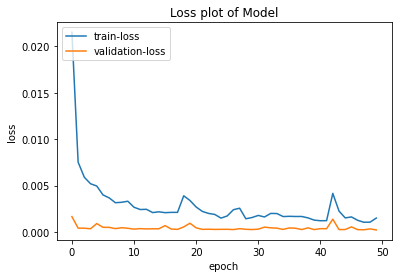

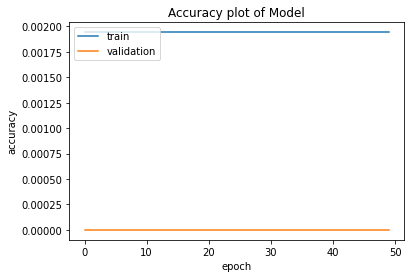

In [66]:
plot_history(history)

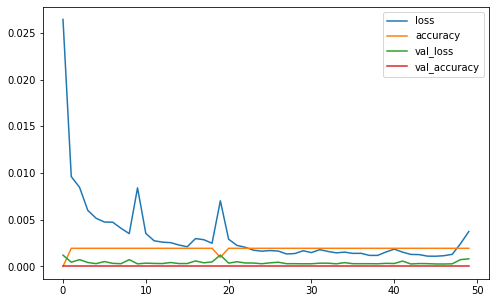

In [74]:
test_predict = model.predict(X_test)
train_predict = model.predict(X_train)

33/33 [==============================] - 4s 100ms/step


In [75]:
# Transform predicted value to original form
test_predict = scaler.inverse_transform(test_predict)
train_predict = scaler.inverse_transform(train_predict)

In [61]:
test_predict

array([[155.2232 ],
       [154.55284],
       [153.83917],
       [153.2681 ],
       [152.7443 ],
       [152.36505],
       [152.1814 ],
       [152.16838],
       [152.25761],
       [152.51387],
       [152.97232],
       [153.66231],
       [154.41217],
       [154.9739 ],
       [155.63152],
       [156.35522],
       [157.00029],
       [157.33395],
       [157.15202],
       [156.51471],
       [155.6056 ],
       [154.61221],
       [153.51631],
       [152.7546 ],
       [152.50754]], dtype=float32)

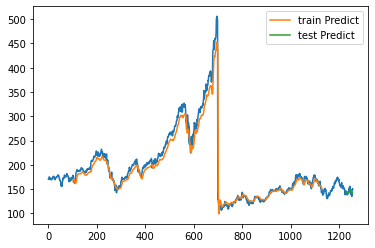

In [78]:
look_back = 100
train_predictP = np.empty_like(df_dataset)  # create a new array with the same shape and type as a given array
train_predictP[:,:] = np.nan
train_predictP[look_back:len(train_predict)+look_back, :] = train_predict


test_predictP = np.empty_like(df_dataset)
test_predictP[:, :] = np.nan
test_predictP[len(train_predict)+(look_back*2)+1:len(df_dataset)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_dataset))
plt.plot(train_predictP, label='train Predict')
plt.plot(test_predictP, label='test Predict')
plt.legend()
plt.show()

In [72]:
train_predictP.shape

(1257, 1)

# Prediction 

In [80]:
x_input=test_data[-100:].reshape(1,-1)
print(x_input.shape)

(1, 100)


In [81]:
temp_input = list(x_input)


[array([0.08721353, 0.07664371, 0.08112711, 0.07484033, 0.0803757 ,
       0.08696306, 0.09036944, 0.09896055, 0.10068879, 0.0952536 ,
       0.09773325, 0.09680651, 0.10427051, 0.10852849, 0.10076393,
       0.11060739, 0.11571697, 0.12150282, 0.1183469 , 0.11549155,
       0.11211021, 0.12510958, 0.12651221, 0.13943644, 0.13693175,
       0.1331747 , 0.14850344, 0.14770194, 0.14654978, 0.14534753,
       0.14547276, 0.15629305, 0.15441453, 0.16345648, 0.1661866 ,
       0.16578585, 0.16959299, 0.16859111, 0.16200376, 0.15211021,
       0.15125861, 0.15201002, 0.15827176, 0.14221666, 0.13660614,
       0.13041954, 0.1261866 , 0.12804008, 0.12265498, 0.11944897,
       0.12303068, 0.11927364, 0.1265623 , 0.14174076, 0.11772073,
       0.12140263, 0.11403882, 0.10985598, 0.11932373, 0.1253851 ,
       0.11742016, 0.11496556, 0.10917971, 0.11003131, 0.11251096,
       0.10770194, 0.08926738, 0.07854728, 0.08919224, 0.09833438,
       0.09908579, 0.09665623, 0.08328115, 0.0841077 , 0.0805

In [103]:
lst_output = []
i = 0
while (i<100):
    if (len(temp_input)>99):
        x_input=np.array(temp_input[-n_steps:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(f'{i} day output {yhat}')
        temp_input.append(yhat[0])
        temp_input = temp_input[-n_steps:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f'{i} day else output {yhat}')
        temp_input.append(yhat[0])
        temp_input = temp_input[-n_steps:]
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.0925

5 day output [[0.08948344]]
6 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.0925

11 day output [[0.0878164]]
12 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.092

17 day output [[0.08646908]]
18 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09

23 day output [[0.08540587]]
24 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09

29 day output [[0.08458488]]
30 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09

35 day output [[0.08394548]]
36 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08

41 day output [[0.08344477]]
42 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.08

48 day output [[0.08299711]]
49 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08

55 day output [[0.08266164]]
56 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08

61 day output [[0.08244164]]
62 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08

67 day output [[0.08226962]]
68 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08

73 day output [[0.08213513]]
74 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08385329]
 [0.08376478]
 [0.08367981]
 [0.08359822]
 [0.08351993]
 [0.08344477]
 [0.08

79 day output [[0.08202998]]
80 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08385329]
 [0.08376478]
 [0.08367981]
 [0.08359822]
 [0.08351993]
 [0.08344477]
 [0.08337265]
 [0.08330343]
 [0.08323701]
 [0.08317327]
 [0.08311212]
 [0.08305343]
 [0.08

85 day output [[0.08194776]]
86 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08385329]
 [0.08376478]
 [0.08367981]
 [0.08359822]
 [0.08351993]
 [0.08344477]
 [0.08337265]
 [0.08330343]
 [0.08323701]
 [0.08317327]
 [0.08311212]
 [0.08305343]
 [0.08299711]
 [0.08294308]
 [0.08289122]
 [0.08284146]
 [0.08279368]
 [0.08274785]
 [0.08

91 day output [[0.08188347]]
92 day input [[0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08385329]
 [0.08376478]
 [0.08367981]
 [0.08359822]
 [0.08351993]
 [0.08344477]
 [0.08337265]
 [0.08330343]
 [0.08323701]
 [0.08317327]
 [0.08311212]
 [0.08305343]
 [0.08299711]
 [0.08294308]
 [0.08289122]
 [0.08284146]
 [0.08279368]
 [0.08274785]
 [0.08270386]
 [0.08266164]
 [0.08262111]
 [0.08258221]
 [0.08254489]
 [0.08250905]
 [0.08

97 day output [[0.08183321]]
98 day input [[0.09255573]
 [0.09255573]
 [0.09080099]
 [0.09066477]
 [0.09041989]
 [0.09011889]
 [0.08979998]
 [0.08948344]
 [0.08917741]
 [0.08888382]
 [0.08860207]
 [0.08833094]
 [0.0880693 ]
 [0.0878164 ]
 [0.08757177]
 [0.0873352 ]
 [0.08710664]
 [0.08688609]
 [0.08667356]
 [0.08646908]
 [0.08627264]
 [0.08608413]
 [0.08590342]
 [0.08573032]
 [0.08556455]
 [0.08540587]
 [0.08525396]
 [0.08510848]
 [0.08496914]
 [0.08483562]
 [0.08470762]
 [0.08458488]
 [0.08446712]
 [0.08435412]
 [0.08424563]
 [0.08414149]
 [0.08404149]
 [0.08394548]
 [0.08385329]
 [0.08376478]
 [0.08367981]
 [0.08359822]
 [0.08351993]
 [0.08344477]
 [0.08337265]
 [0.08330343]
 [0.08323701]
 [0.08317327]
 [0.08311212]
 [0.08305343]
 [0.08299711]
 [0.08294308]
 [0.08289122]
 [0.08284146]
 [0.08279368]
 [0.08274785]
 [0.08270386]
 [0.08266164]
 [0.08262111]
 [0.08258221]
 [0.08254489]
 [0.08250905]
 [0.08247465]
 [0.08244164]
 [0.08240996]
 [0.08237954]
 [0.08235034]
 [0.08232232]
 [0.08

In [91]:
prev_day = np.arange(1,101)
predict_day = np.arange(101,201)

df_lst = df_dataset.tolist()
df_lst.extend(lst_output)

In [97]:
print(df_dataset[-200:].shape)
print(np.array(lst_output).shape)

(200, 1)
(100, 1)


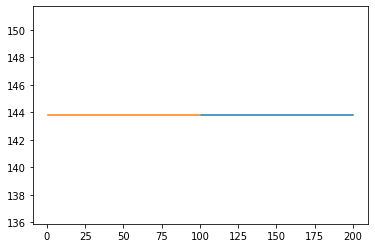

In [100]:


plt.plot(predict_day, scaler.inverse_transform(lst_output))
plt.plot(prev_day, scaler.inverse_transform(df_lst[-100:]))


In [101]:
lst_output

[[0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.09255573153495789],
 [0.092555731534